# Projekt MSP1 / 2025
Cílem tohoto projektu je se seznámit s programovými nástroji využívaných ve statistice a osvojit si základní procedury. Projekt není primárně zaměřen na efektivitu využívání programového vybavení (i když úplně nevhodné konstrukce mohou mít vliv na hodnocení), ale nejvíce nás zajímají vaše statistické závěry a způsob vyhodnocení. Dbejte také na to, že každý graf musí splňovat nějaké podmínky - přehlednost, čitelnost, popisky.

V projektu budete analyzovat časy běhu šesti různých konfigurací algoritmů. Ke každé konfiguraci vzniklo celkem 500 nezávislých běhů, jejichž logy máte k dispozici v souboru [logfiles.zip](logfiles.zip).

Pokud nemáte rozchozené prostředí pro pro spouštění Jupyter notebooku, můžete využit službu [Google Colab](https://colab.google/). Jakákoliv spolupráce, sdílení řešení a podobně je zakázáno!

S případnými dotazy se obracejte na Davida Hudáka (ihudak@fit.vutbr.cz).

__Odevzdání:__ tento soubor (není potřeba aby obsahoval výstupy skriptů) do pondělí 3. 11. 2025 v IS VUT. Kontrola bude probíhat na Pythonu 3.12.3 (standardní instalace Ubuntu); neočekává se však to, že byste používali nějaké speciality a nekompatibilní knihovny. V případě nesouladu verzí a podobných problémů budete mít možnost reklamace a prokázání správnosti funkce. Bez vyplnění vašich komentářů a závěrů do označených buněk nebude projekt hodnocen!

__Upozornění:__ nepřidávejte do notebooku další buňky, odpovídejte tam, kam se ptáme (textové komentáře do Markdown buněk)

__Tip:__ před odevzdáním resetujte celý notebook a zkuste jej spustit od začátku. Zamezíte tak chybám krokování a editací, kdy výsledek z buňky na konci použijete na začátku.

__OTÁZKA K DOPLNĚNÍ:__

_Matej Olexa - xolexa03_

## Načtení potřebných knihoven
Načtěte knihovny, které jsou nutné pro zpracování souborů a práci se statistickými funkcemi.

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import json
from zipfile import ZipFile

## Načtení dat do DataFrame
Ze souboru `logfiles.zip` umístěném ve stejném adresáři načtěte data a vytvořte Pandas DataFrame.

Výsledky jsou uložené ve formátu JSON - pro zpracování použijte knihovnu `json`.
Můžete využít následující kostru - je vhodné pracovat přímo se ZIP souborem. Jedinou nevýhodou může být to, že vám bude vracet _byte_ objekt, který musíte přes funkci `decode` zpracovat.

Upravte také pomocí funkce `.astype()` datové typy patřičných sloupců.

```py
data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        # TODO test názvu souboru
        with zf.open(filename, "r") as f:
            pass # vytvořte slovník

df = pd.DataFrame(data)
df
```

In [344]:
# TODO
data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        # TODO test názvu souboru
        if filename.endswith(".json"):
            with zf.open(filename, "r") as f:
                file_content = f.read().decode("utf-8")
                log_data = json.loads(file_content)
                data.append(log_data)
                

df = pd.DataFrame(data)
df['configuration'] = df['configuration'].astype('category')
df['run'] = df['run'].astype('int32')
df['runtime'] = df['runtime'].astype('float64')
df['status'] = df['status'].astype('category')


print(f"Celkový počet záznamů: {len(df)}")
print(f"\nPrvních 5 záznamů:")
df.head()



Celkový počet záznamů: 3000

Prvních 5 záznamů:


,configuration,run,runtime,status
0,config6,185,59.828423,SUCCESS
1,config6,189,108.574341,SUCCESS
2,config3,104,144.167656,SUCCESS
3,config1,106,126.062962,SUCCESS
4,config2,24,164.232298,SUCCESS


## Analýza a čištění dat
Vhodným způsobem pro všechny konfigurace analyzujte časy běhů a pokud tam jsou, identifikujte hodnoty, které jsou chybné. Vyberte vhodný graf, který zobrazí samostatně jednotlivé konfigurace.

Zakladne informacie o datach:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   configuration  3000 non-null   category
 1   run            3000 non-null   int32   
 2   runtime        3000 non-null   float64 
 3   status         3000 non-null   category
dtypes: category(2), float64(1), int32(1)
memory usage: 41.5 KB
None
               run      runtime
count  3000.000000  3000.000000
mean    249.500000   157.723575
std     144.361341   191.303589
min       0.000000     0.000000
25%     124.750000   108.665890
50%     249.500000   142.644441
75%     374.250000   170.057001
max     499.000000  1800.000000
Pocet hodnot <0: 0
Pocet hodnot ==0: 29
---------------------------------------------
Informacie o nevalidnych datach
configuration    0
run              0
runtime          0
status           0
dtype: int64
configuration    False
run    

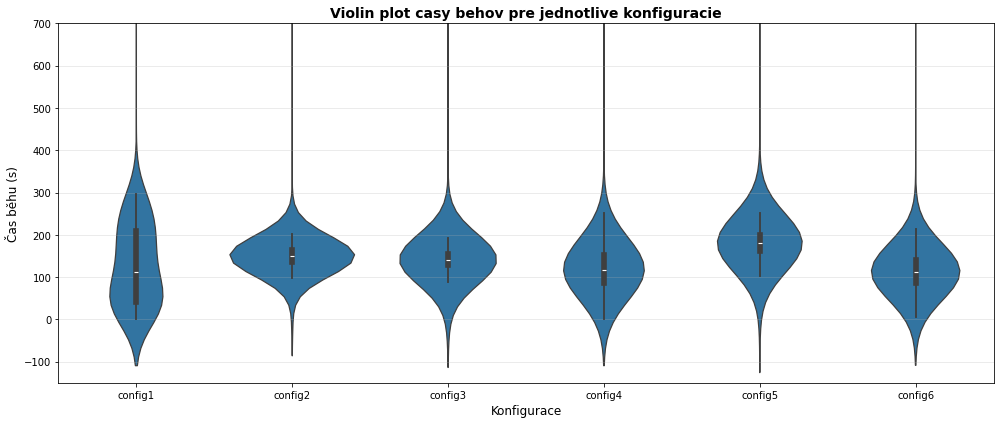

In [345]:
print("Zakladne informacie o datach:")
print(df.info())
print(df.describe())
print(f"Pocet hodnot <0: {(df['runtime'] < 0).sum()}")
print(f"Pocet hodnot ==0: {(df['runtime'] == 0).sum()}")
print("---------------------------------------------")
print("Informacie o nevalidnych datach")
print(df.isnull().sum())
print(df.isna().any())

print("---------------------------------------------")

print(f"Unikatne konfiguracie:{df['configuration'].unique()}")
print(f"Počet unikatnych konfiguracii: {df['configuration'].nunique()}")
print(f"Rozdelenie statusu:{df['status'].value_counts()}")



plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='configuration', y='runtime')
plt.title('Violin plot casy behov pre jednotlive konfiguracie', fontsize=14, fontweight='bold')
plt.xlabel('Konfigurace', fontsize=12)
plt.ylabel('Čas běhu (s)', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(-150, 700)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


__OTÁZKA K DOPLNĚNÍ:__

_Objevily se nějaké chybné hodnoty? Proč tam jsou s ohledem na to, že se jedná o běhy algoritmů? Proč jste zvolili tento typ grafu?_


Vyčistěte dataframe `df` tak, aby tam tyto hodnoty nebyly a ukažte znovu analýzu toho, že čištění dat bylo úspěšné. Odtud dále pracujte s vyčištěným datasetem.

Pocet zaznamov pred cistenim: 3000
Pocet odstranenych zaznamov: 66
Pocet zaznamov po cisteni: 2934

Kontrola vycistenych dat:
Minimalny runtime: 1.87
Maximalny runtime: 297.20
Pocet zapornych hodnot: 0
Pocet nulovych hodnot: 0


/tmp/ipykernel_15507/764151578.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='configuration', y='runtime', palette='Set2', cut=0, inner='box')


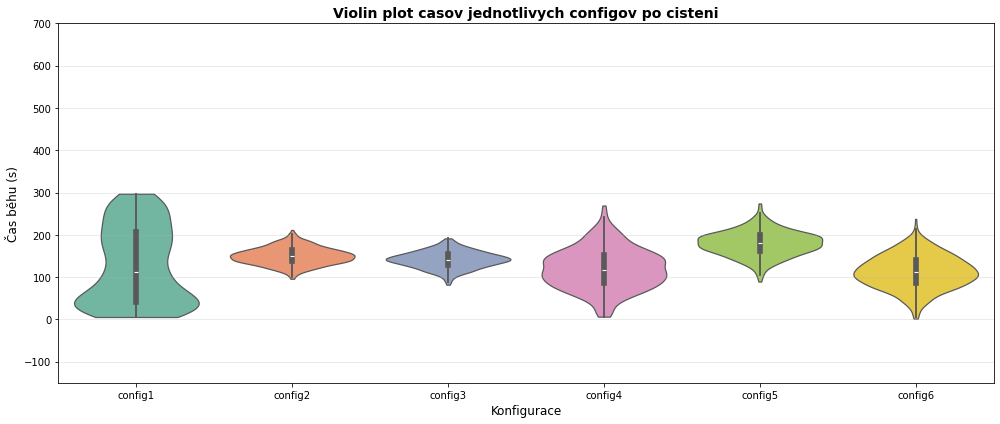

In [346]:
original_count = len(df)

df_clean = df[df['status'] == 'SUCCESS'].copy()

df_clean = df_clean[df_clean['runtime'] > 0]


removed_count = original_count - len(df_clean)

print(f"Pocet zaznamov pred cistenim: {original_count}")
print(f"Pocet odstranenych zaznamov: {removed_count}")
print(f"Pocet zaznamov po cisteni: {len(df_clean)}")
print(f"\nKontrola vycistenych dat:")
print(f"Minimalny runtime: {df_clean['runtime'].min():.2f}")
print(f"Maximalny runtime: {df_clean['runtime'].max():.2f}")
print(f"Pocet zapornych hodnot: {(df_clean['runtime'] < 0).sum()}")
print(f"Pocet nulovych hodnot: {(df_clean['runtime'] == 0).sum()}")

plt.figure(figsize=(14, 6))
sns.violinplot(data=df_clean, x='configuration', y='runtime', palette='Set2', cut=0, inner='box')
plt.title('Violin plot casov jednotlivych configov po cisteni', fontsize=14, fontweight='bold')
plt.xlabel('Konfigurace', fontsize=12)
plt.ylabel('Čas běhu (s)', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(-150, 700) 
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()




## Deskriptivní popis hodnot
Vypište pro jednotlivé konfigurace základní deskriptivní parametry.  

__TIP__ pokud výsledky uložíte jako Pandas DataFrame, zobrazí se v tabulce.

In [347]:
descriptive_stats = df_clean.groupby('configuration')['runtime'].describe()

descriptive_stats['Rozptylenie'] = df_clean.groupby('configuration')['runtime'].var()
descriptive_stats['Sikmost'] = df_clean.groupby('configuration')['runtime'].apply(stats.skew)
descriptive_stats['Spicatost'] = df_clean.groupby('configuration')['runtime'].apply(stats.kurtosis)

descriptive_stats = descriptive_stats.rename(columns={
    'count': 'Pocet',
    'mean': 'Priemer',
    '50%': 'Median',
    'std': 'Smer. odchylka',
    'min': 'Minimum',
    'max': 'Maximum',
})



# Výběr a seřazení sloupců
descriptive_stats = descriptive_stats[[
    'Pocet', 'Priemer', 'Median', 'Smer. odchylka', 'Rozptylenie', 'Minimum', 'Maximum', 'Sikmost', 'Spicatost'
]].round(4)

# Zobrazení tabulky
print("Deskriptivní statistiky časů běhu pro jednotlivé konfigurace:")
print("="*100)
descriptive_stats


Deskriptivní statistiky časů běhu pro jednotlivé konfigurace:


/tmp/ipykernel_15507/3716673652.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descriptive_stats = df_clean.groupby('configuration')['runtime'].describe()
/tmp/ipykernel_15507/3716673652.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descriptive_stats['Rozptylenie'] = df_clean.groupby('configuration')['runtime'].var()
/tmp/ipykernel_15507/3716673652.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descriptiv

,Pocet,Priemer,Median,Smer. odchylka,Rozptylenie,Minimum,Maximum,Sikmost,Spicatost
configuration,,,,,,,,,
config1,489.0,126.8926,111.0499,90.5293,8195.5555,5.5961,297.1990,0.3180,-1.2805
config2,492.0,150.1907,149.4318,20.1503,406.0347,96.0623,211.5776,0.1551,-0.1742
config3,485.0,141.4200,141.5364,19.8733,394.9497,82.0749,191.5942,-0.1193,-0.0526
config4,489.0,120.5400,117.8588,48.4209,2344.5881,6.4780,269.2630,0.1697,-0.1006
config5,488.0,179.8651,180.1144,29.4998,870.2374,89.4146,274.1325,-0.0320,0.2507
config6,491.0,112.6670,111.7441,39.1185,1530.2561,1.8707,237.7243,-0.0195,-0.1389


__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte, co všechno můžeme z parametrů vyčíst._

## Vizualizace
Vizualizujte časy běhů algoritmů tak, aby byl v jednom grafu zřejmý i rozptyl hodnot, avšak bylo možné porovnání. Zvolte vhodný graf, který pak níže komentujte.

/tmp/ipykernel_15507/3087666919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='configuration', y='runtime', palette='Set2',ax=ax1, cut=0, inner='box')
/tmp/ipykernel_15507/3087666919.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='configuration', y='runtime',
/tmp/ipykernel_15507/3087666919.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax4.legend(title='Konfiguracia', loc='upper right')


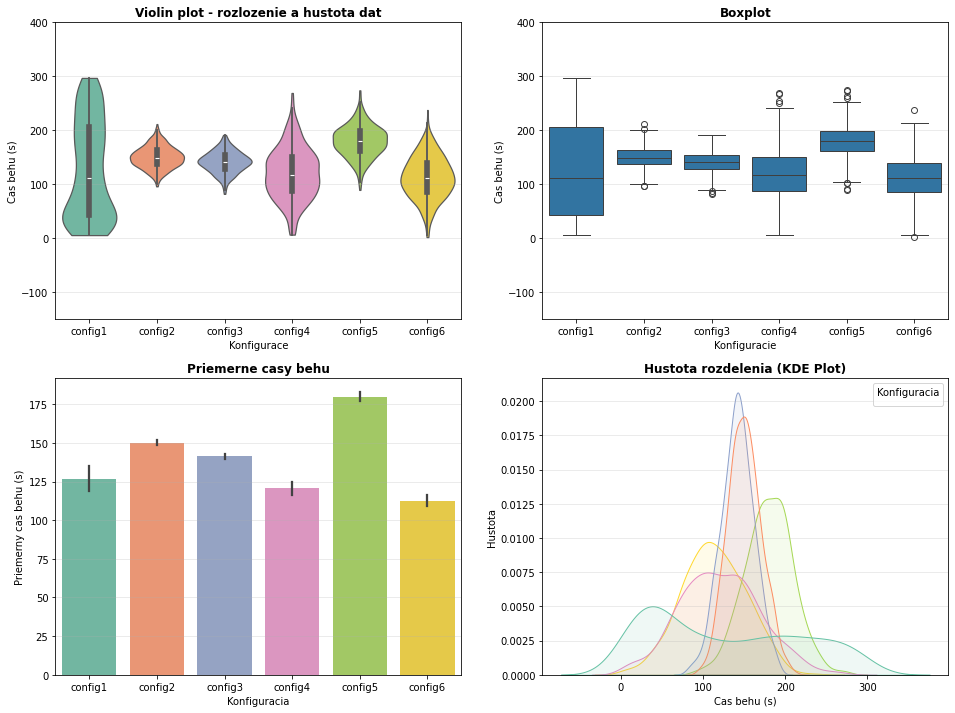

In [348]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Violin plot - kombinace boxplotu a kernel density
ax1 = axes[0, 0]
sns.violinplot(data=df_clean, x='configuration', y='runtime', palette='Set2',ax=ax1, cut=0, inner='box')

ax1.set_title('Violin plot - rozlozenie a hustota dat', fontsize=12, fontweight='bold')
ax1.set_xlabel('Konfigurace', fontsize=10)
ax1.set_ylabel('Cas behu (s)', fontsize=10)
ax1.set_ylim(-150, 400)
ax1.grid(axis='y', alpha=0.3)

# 2. Boxplot s jednotlivými body (swarmplot overlay)
ax2 = axes[0, 1]
sns.boxplot(data=df_clean, x='configuration', y='runtime', ax=ax2)
ax2.set_title('Boxplot', fontsize=12, fontweight='bold')
ax2.set_xlabel('Konfiguracie', fontsize=10)
ax2.set_ylabel('Cas behu (s)', fontsize=10)
ax2.set_ylim(-150, 400)
ax2.grid(axis='y', alpha=0.3)

# 4. Bar plot (priemerné časy)
ax3 = axes[1, 0]
# 'estimator=np.mean' je defaultné, takže ho nemusíte písať
# Ak by ste chceli robustnejší medián: estimator=np.median
sns.barplot(data=df_clean, x='configuration', y='runtime', 
            palette='Set2', ax=ax3, estimator=np.mean) 

ax3.set_title('Priemerne casy behu', fontsize=12, fontweight='bold')
ax3.set_xlabel('Konfiguracia', fontsize=10)
ax3.set_ylabel('Priemerny cas behu (s)', fontsize=10)
ax3.grid(axis='y', alpha=0.3)



ax4 = axes[1, 1]
sns.kdeplot(data=df_clean, x='runtime', hue='configuration', 
            fill=True, common_norm=False, palette='Set2', alpha=0.1, ax=ax4)

ax4.set_title('Hustota rozdelenia (KDE Plot)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Cas behu (s)', fontsize=10)
ax4.set_ylabel('Hustota', fontsize=10)
ax4.legend(title='Konfiguracia', loc='upper right')
ax4.grid(axis='y', alpha=0.3)



__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte  výsledky z tabulky._

## Určení efektivity konfigurací algoritmů
Nás ale zajímá, jaká konfigurace je nejrychlejší. Z výše vykresleného grafu můžeme vyloučit některé konfigurace. Existuje tam však minimálně jedna dvojice, u které nedokážeme jednoznačně určit, která je lepší - pokud nebudeme porovnávat pouze extrémní hodnoty, které mohou být dané náhodou, ale celkově. Proto proveďte vhodný test významnosti - v následující části diskutujte zejména rozložení dat (i s odkazem na předchozí buňky, variabilitu vs polohu a podobně). Je nutné každý logický krok a výběry statistických funkcí komentovat. Určete také směr (tzn. která implementace je lepší).

Vužijte vhodnou funkci z knihovny `scipy.stats` a funkci poté __implementujte sami__ na základě základních matematických funkcí knihovny `numpy` případně i funkcí pro výpočet vhodného rozložení v [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.html). Při vlastní implementaci není nutné se primárně soustředit na efektivitu výpočtu (není potřeba využít všechny funkce numpy, můžete použít normální cykly a podobně - v hodnocení však bude zahrnuta přehlednost a neměly by se objevit jasné chyby, jako je zvýšení třídy složitosti a podobně). V případě, že pro řešení úlohy využijete více testů, stačí implementovat pouze jeden. 

__OTÁZKA K DOPLNĚNÍ:__

_Jaká data budete zkoumat? Jaké mají rozložení a parametry (např. varianci) a jaký test použijete? Jaká je nulová hypotéza? Jak se liší variabilita a poloha vybraných konfigurací?_

Priemerne casy behu pre jednotlive konfiguracie:
configuration
config6    132.238999
config4    139.488140
config1    142.100946
config2    162.187636
config3    162.377423
config5    207.948303
Name: runtime, dtype: float64

------------------------------------------------------

Najrychlejsia konfiguracia: config6 s priemernym casom behu 132.24 s
Druha najrychlejsia konfiguracia: config4 s priemernym casom behu 139.49 s

 Vysledky t-testu pre porovnanie dvoch najrychlejsich konfiguracii:
T-statistika: -2.7991
P-hodnota: 0.0052
Hladina významnosti: 0.05
---------------------------------------------
P-hodnota: 0.0052 < 0.05
Rozdiel v priemernych casoch behu je štatisticky významný (zamietame H0).
Konfiguracia config6 je rychlejsia ako config4.


/tmp/ipykernel_15507/893950439.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_times = df.groupby('configuration')['runtime'].mean().sort_values()
/tmp/ipykernel_15507/893950439.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Najrychlejsia konfiguracia: {config_first} s priemernym casom behu {mean_times[0]:.2f} s")
/tmp/ipykernel_15507/893950439.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Dr

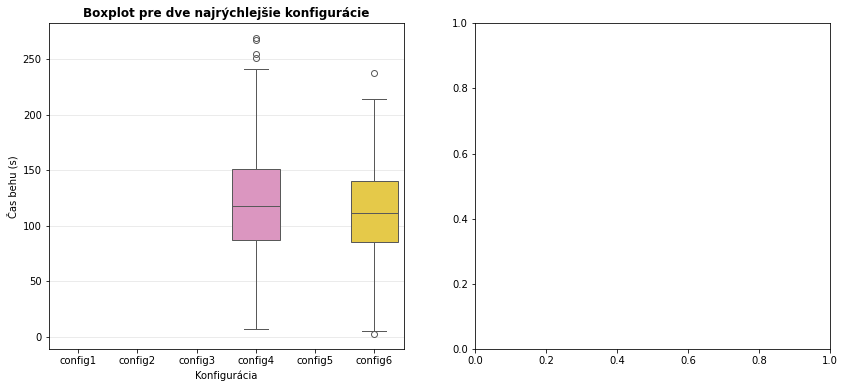

In [349]:
print("Priemerne casy behu pre jednotlive konfiguracie:")
mean_times = df.groupby('configuration')['runtime'].mean().sort_values()
print(mean_times)
print("\n" + "------------------------------------------------------" + "\n")

config_first = mean_times.index[0]  # Najrychlejsia
config_second = mean_times.index[1]  # Druhá najrychlejsia

print(f"Najrychlejsia konfiguracia: {config_first} s priemernym casom behu {mean_times[0]:.2f} s")
print(f"Druha najrychlejsia konfiguracia: {config_second} s priemernym casom behu {mean_times[1]:.2f} s")

data_first = df_clean[df_clean['configuration'] == config_first]['runtime']
data_second = df_clean[df_clean['configuration'] == config_second]['runtime']

print("\n Vysledky t-testu pre porovnanie dvoch najrychlejsich konfiguracii:")

t_stat, p_value = stats.ttest_ind(data_first, data_second, equal_var=False)

print(f"T-statistika: {t_stat:.4f}")
print(f"P-hodnota: {p_value:.4f}")
print(f"Hladina významnosti: 0.05")

print("---------------------------------------------")

if p_value < 0.05:
    print(f"P-hodnota: {p_value:.4f} < 0.05")
    print("Rozdiel v priemernych casoch behu je štatisticky významný (zamietame H0).")
    if(np.mean(data_first) < np.mean(data_second)):
        print(f"Konfiguracia {config_first} je rychlejsia ako {config_second}.")
    else:
        print(f"Konfiguracia {config_second} je rychlejsia ako {config_first}.")
else:
    print(f"P-hodnota: {p_value:.4f} >= 0.05")
    print("Rozdiel v priemernych casoch behu nie je štatisticky významný (nezamietame H0).")
    

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot pre dve najrýchlejšie konfigurácie

sns.boxplot(data=df_clean[df_clean['configuration'].isin([config_first, config_second])],
            x='configuration', y='runtime', palette='Set2', ax=axes[0])
axes[0].set_title('Boxplot pre dve najrýchlejšie konfigurácie', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Konfigurácia', fontsize=10)
axes[0].set_ylabel('Čas behu (s)', fontsize=10)
axes[0].grid(axis='y', alpha=0.3)   

plt.show()


__OTÁZKA K DOPLNĚNÍ:__

_Jaký je závěr statistického testu?_

### Vlastní implementace
Implementujte stejný test pomocí knihovních funkcí a ukažte, že je výsledek stejný.

In [350]:
# TODO vlastni implementace zvoleneho testu